<a href="https://colab.research.google.com/github/PomazkinG/Particle/blob/master/Particle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=0fbfb3e9174ff30c6fdbc0bd51ebed48da63cc4cf073067ae7605b80187f4a36
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

Q1

In [16]:
stock_list = ['AAPL', 'GS', 'MSFT']
daily_price_df = yf.download(stock_list, 
                      period = '10y',
                      progress=False)
daily_price_df = daily_price_df['Close']
daily_price_df.head()

,AAPL,GS,MSFT
Date,,,
2010-04-26,38.500000,152.029999,31.110001
2010-04-27,37.434284,153.039993,30.850000
2010-04-28,37.371429,157.009995,30.910000
2010-04-29,38.377144,160.240005,31.000000
2010-04-30,37.298573,145.199997,30.540001


In [20]:
daily_price_df.index

DatetimeIndex(['2010-04-26', '2010-04-27', '2010-04-28', '2010-04-29',
               '2010-04-30', '2010-05-03', '2010-05-04', '2010-05-05',
               '2010-05-06', '2010-05-07',
               ...
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

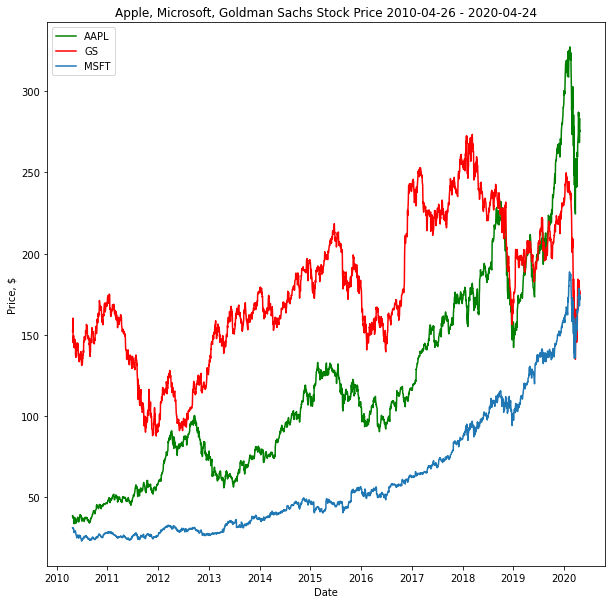

In [22]:
plt.figure(figsize=(10,10))
plt.plot(daily_price_df['AAPL'], 'g', label="AAPL")
plt.plot(daily_price_df['GS'], 'r', label="GS")
plt.plot(daily_price_df['MSFT'], label="MSFT")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price, $')
plt.title('Apple, Microsoft, Goldman Sachs Stock Price 2010-04-26 - 2020-04-24')
plt.show()

Q2